In [2]:
from PIL import Image, ImageDraw #Импорт необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt

In [168]:
with Image.open("cot11.png") as im:  #использование менеджера контекста, конвертация в массив яркостей
     im = im.convert("L")
image = np.asarray(im)

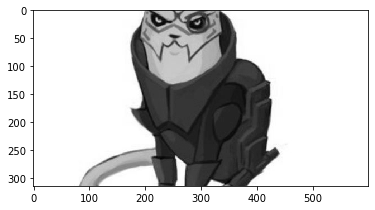

In [169]:
plt.imshow(image, cmap="gray")

In [170]:
def grad_xy(image):
    image = image.astype(int)
    x = np.zeros_like(image).astype(int)
    y = np.zeros_like(image).astype(int)
    #x = np.zeros(image.shape)
    #y= np.zeros(image.shape)
    for i in range(1, image.shape[0]):
        for j in range(1, image.shape[1]):
            x[i, j] = 255*(image[i, j]/255-image[i-1, j]/255)
            y[i, j] = 255*(image[i, j]/255-image[i, j-1]/255)
        
    return x, y

In [171]:
x, y = grad_xy(image)

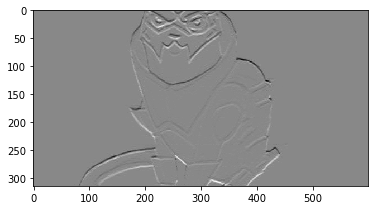

In [172]:
plt.imshow(x, cmap="gray")

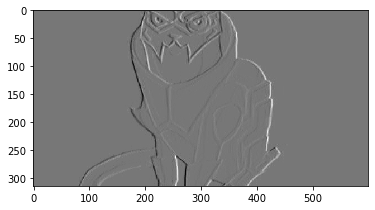

In [173]:
plt.imshow(y, cmap="gray")

In [174]:
Image.fromarray(np.abs(x).astype("uint8")).save("cotx.png")
Image.fromarray(np.abs(y).astype("uint8")).save("coty.png")

In [175]:
def grad(x, y):
    #result = np.zeros_like(x)
    result = [np.sqrt(x[i,j]*x[i,j]+y[i,j]*y[i,j])  for i in range(x.shape[0]) for j in range(y.shape[1])]
    grad_m = np.array(result).reshape(x.shape)
    return grad_m

In [176]:
gradient = grad(x, y)

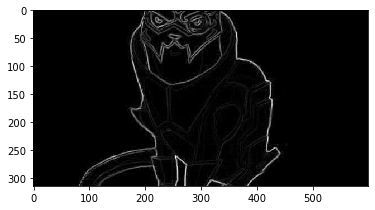

In [177]:
plt.imshow(gradient, cmap="gray")

In [64]:
Image.fromarray(gradient.astype("uint8")).save("cotgrad.png")

In [184]:
with Image.open("cotgrad.png") as am:  #использование менеджера контекста, конвертация в массив яркостей
    image_gr = np.asarray(am)

In [14]:
def porog(image, threshold):
    width = image.shape[0]  # Определяем ширину
    height = image.shape[1]
    nb = np.zeros_like(image).astype(int)# Определяем высоту
    for i in range(width):
        for j in range(height):
            if image[i,j] > threshold:
                nb[i, j] = 255
            else:
                nb[i, j] = 0
                
    return nb

In [191]:
c = porog(image_gr, 20)

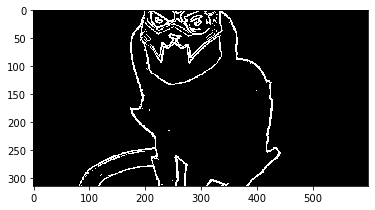

In [192]:
plt.imshow(c, cmap="gray"
          )

In [54]:
from skimage import filters

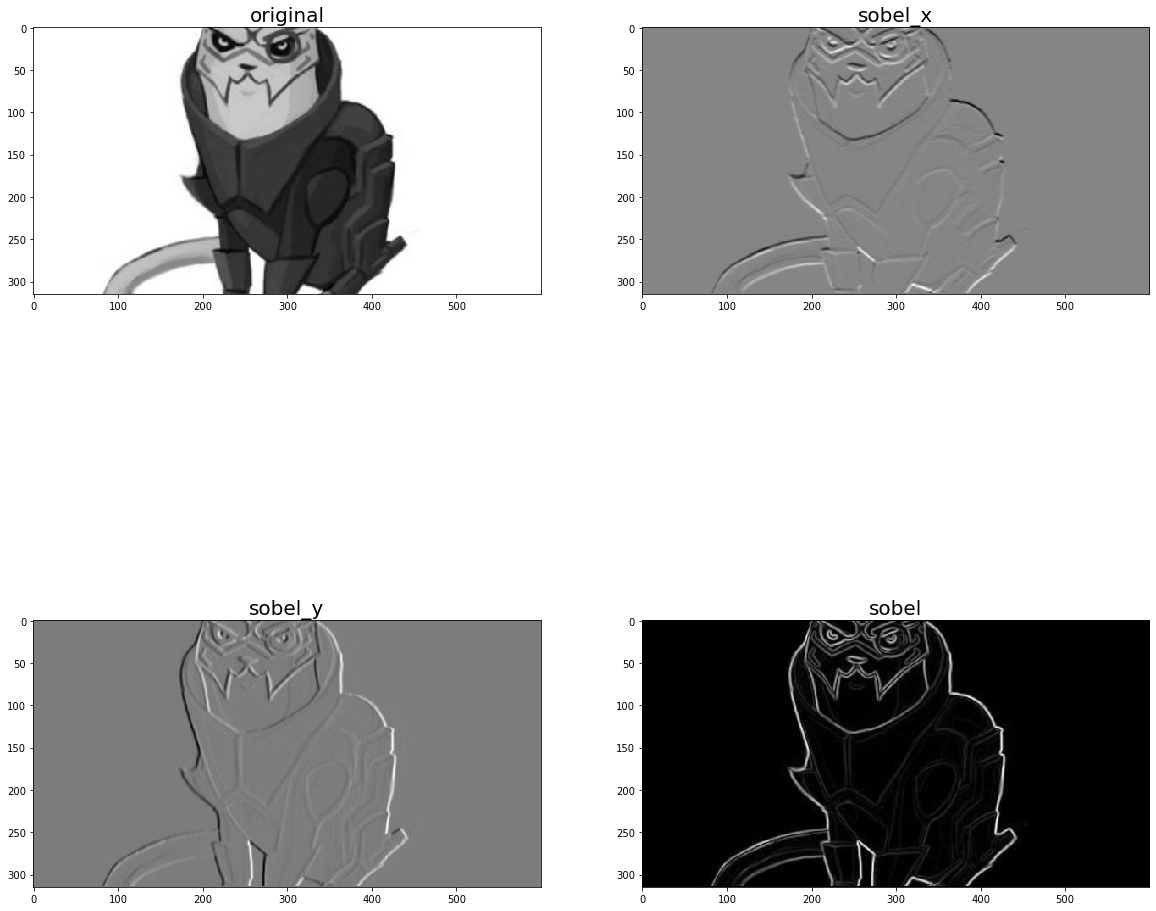

In [48]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage import filters
im = rgb2gray(imread('cot.jpg'))
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.imshow(im, cmap='gray')
plt.title('original', size=20, )
plt.subplot(222)
edges_x = filters.sobel_h(im, ) 
plt.imshow(edges_x, cmap='gray')
plt.title('sobel_x', size=20)
plt.subplot(223)
edges_y = filters.sobel_v(im)
plt.imshow(edges_y, cmap='gray')
plt.title('sobel_y', size=20)
plt.subplot(224)
edges = filters.sobel(im)
plt.imshow(edges, cmap='gray')
plt.title('sobel', size=20)
plt.show()

## Собеля

In [3]:
x_sob = np.array([[-1, -2, -1],[0, 0, 0], [1,2,1]])
y_sob = x_sob.T

In [1]:
v = [100, 200, 300]
b = [i for i, id in enumerate(v, 1)]

In [235]:
def convolve2dd(image, kernel):
    n1, n2 = image.shape
    m1, m2 = kernel.shape
    Y = np.zeros((n1+m1, n2+m2))
    for x in range(n1):
        for y in range(n2):
            Y[x:x+m1,y:y+m2] += image[x,y]*kernel
    
    return Y

In [229]:
def convolve2ddd(image, kernel):
    n1, n2 = image.shape
    m1, m2 = kernel.shape
    Y = np.zeros((n1+m1, n2+m2))
    for x in range(n1):
        for y in range(n2):
            #print(image[x:x+m1,y:y+m1].shape)
            if x+m1<n1:
                if y+m1<n2:
                    
                    Y[x, y] = np.sum(image[x:x+m1,y:y+m1]*kernel)
    
    return Y

In [230]:
sobel_x1 = convolve2ddd(im, x_sob)

In [231]:
sobel_x2 = convolve2ddd(im, y_sob)

In [188]:
sobel_x1 = convolve2dd(im, x_sob)

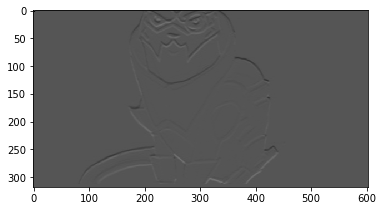

In [234]:
plt.imshow(sobel_x1, cmap='gray')

In [174]:
sobel_x2 = convolve2dd(im, y_sob)

In [232]:
gard__ = abs(sobel_x1) + abs(sobel_x2)

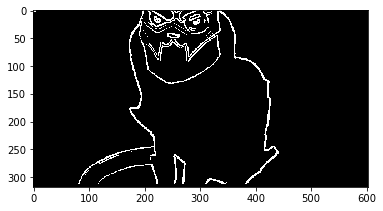

In [233]:
plt.imshow(porog(gard__, 1), cmap='gray')

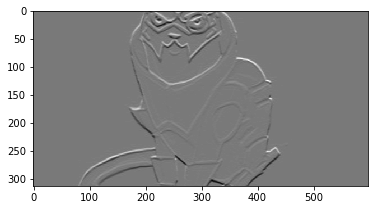

In [167]:
plt.imshow(sobel_x1, cmap='gray')

In [4]:
from scipy.signal import convolve2d

In [5]:
with Image.open("cot11.png") as im: 
    im = im.convert("L")
    image = np.asarray(im)

In [144]:
sobel_x = convolve2d(x_sob, im)

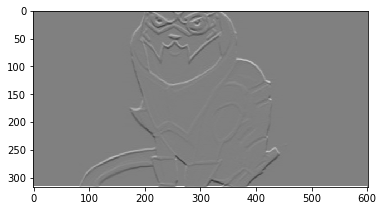

In [118]:
plt.imshow(sobel_x, cmap='gray')

In [145]:
sobel_y = convolve2d(y_sob, im)

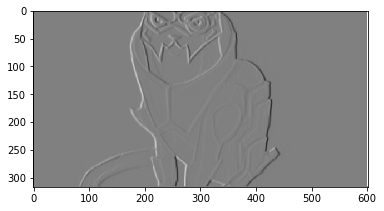

In [59]:
plt.imshow(sobel_y, cmap='gray')

In [146]:
sobel = abs(sobel_x) + abs(sobel_y)

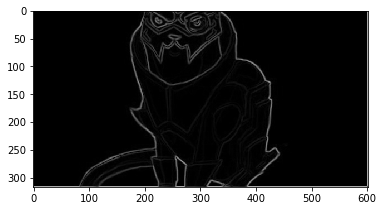

In [149]:
plt.imshow(sobel, cmap='gray')

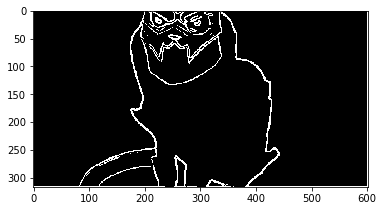

In [150]:
plt.imshow(porog(sobel, 1), cmap='gray')

## Просто градиент для интереса

In [274]:
x_m = np.array([-1,1 ])
x_m = x_m.reshape(x_m.size, 1)
y_m = np.array([-1, 1])
y_m = y_m.reshape(1, 2)

In [180]:
x_gr = convolve2d(x_m, im)

In [275]:
y_gr = convolve2d(y_m, im)

In [192]:
x_gr1 = x_gr.astype("uint8")

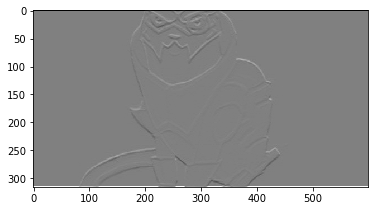

In [194]:
plt.imshow(x_gr, cmap='gray')

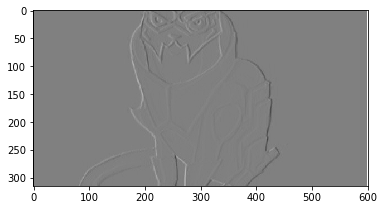

In [277]:
plt.imshow(y_gr, cmap='gray')

### Cогласование

In [205]:
a = np.array([[-1, -1, -1], [0,0,0], [1, 1,1]])
b = a.T

In [88]:
x_s = convolve2d(a/6, im)

In [206]:
x_s1 = convolve2dd(im, a/6)

In [207]:
y_s1 = convolve2dd(im, b/6)

In [209]:
grad_s1 = np.sqrt((x_s1)*x_s1 + y_s1*y_s1)

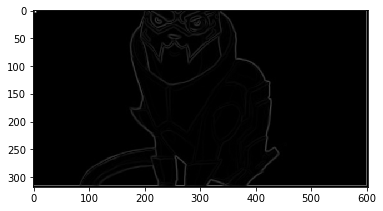

In [210]:
plt.imshow(grad_s1, cmap='gray')

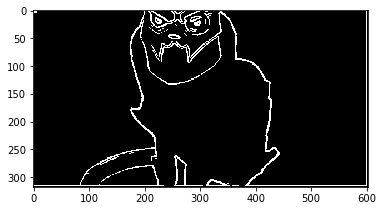

In [215]:
plt.imshow(porog(grad_s1, 0.1), cmap='gray')

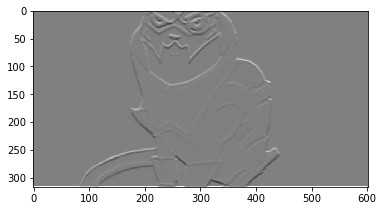

In [89]:
plt.imshow(x_s, cmap='gray')

In [90]:
y_s = convolve2d(b/6, im)

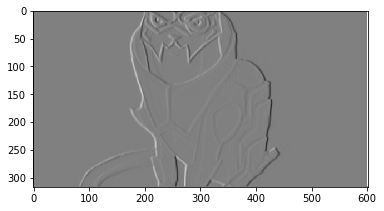

In [91]:
plt.imshow(y_s, cmap='gray')

In [93]:
grad_s = np.sqrt((x_s)*x_s + y_s*y_s)

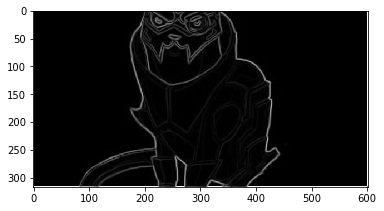

In [94]:
plt.imshow(grad_s, cmap='gray')

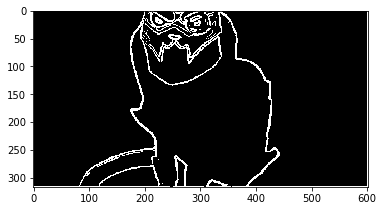

In [204]:
plt.imshow(porog(grad_s, 20), cmap='gray')

In [246]:
g ={1:"l", "5":"mm"}

In [247]:
"5" in g

True